In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    resPath = extSSDpath + getProjectFoldername() + '/non_lin_models/gillespie_non_lin_model/results/'
else:
    resPath = '/results/'

In [4]:
resPath = ''

In [20]:
pi = 0.05
q = 1.0
r = 1.0
l1, l2 = 0.2, 3.25
N = 1000
# ic = 'p100-00-00'
# ic = 'p80-10-10'
# ic = 'p60-20-20'
ic = 'p20-70-10'

# ic = 'p00-50-50'

folder = f'sim_results_evos_pis_{pi}_{pi}_qs_{q}_{q}_l1_{l1}_l2_{l2}_N_{N}_ic_{ic}/'

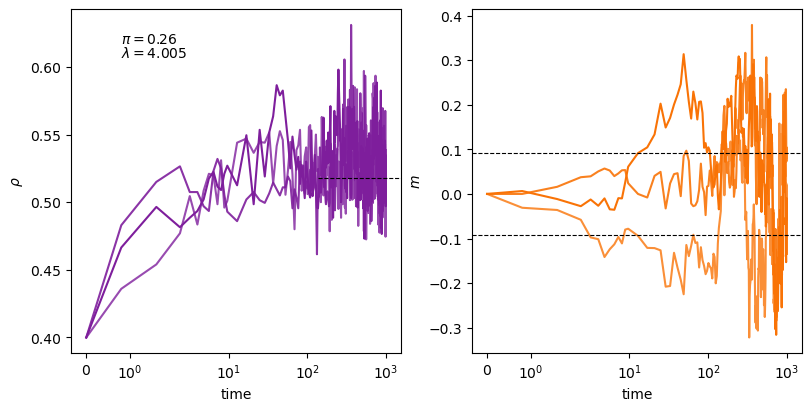

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)

for i in range(2):
    ax[i].set(xlabel='time', xscale='symlog')
ax[0].set_ylabel(r'$\rho$')
ax[1].set_ylabel(r'$m$')

ax[0].text(0.15,0.9, rf'$\pi = {pi}$', transform=ax[0].transAxes)
ax[0].text(0.15,0.86, rf'$\lambda = {l2}$', transform=ax[0].transAxes)

for i in range(3):
    time_evo = pd.read_csv(f'{resPath}{folder}time_evo_rea_{i}.csv')
    time_evo['rho'] = time_evo['f1'] + time_evo['f2']
    time_evo['m'] = time_evo['f1'] - time_evo['f2']
    # time_evo_filtered = time_evo[time_evo.index % 4 == 0]
    time_evo_filtered = time_evo
    ax[0].plot(time_evo_filtered['time'], time_evo_filtered['rho'], color='xkcd:purple', alpha = (10-i)/10)
    ax[1].plot(time_evo_filtered['time'], time_evo_filtered['m'], color='xkcd:orange', alpha = (10-i)/10)

# theoretical solution:
rho = (1+np.sqrt(1-4*r/l2))/2
ax[0].axhline(rho, 0.75, 1.0, ls='--', color='xkcd:black', lw=0.8)
ax[1].axhline(np.sqrt(rho**2 - 4*pi/l2), ls='--', color='xkcd:black', lw=0.8)
ax[1].axhline(-np.sqrt(rho**2 - 4*pi/l2), ls='--', color='xkcd:black', lw=0.8)

# fig.savefig(f'time_evo_pi_{pi}_l1_{l1}_l2_{l2}_N_{N}_ic_{ic}.png')

### plot realizations in different colors

/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_3602/1373930998.py:34: RuntimeWarning: invalid value encountered in sqrt
  rho = 0.5*(1-l1/l2) + 1/(2*l2)*np.sqrt((l1+l2)**2 - 4*l2)


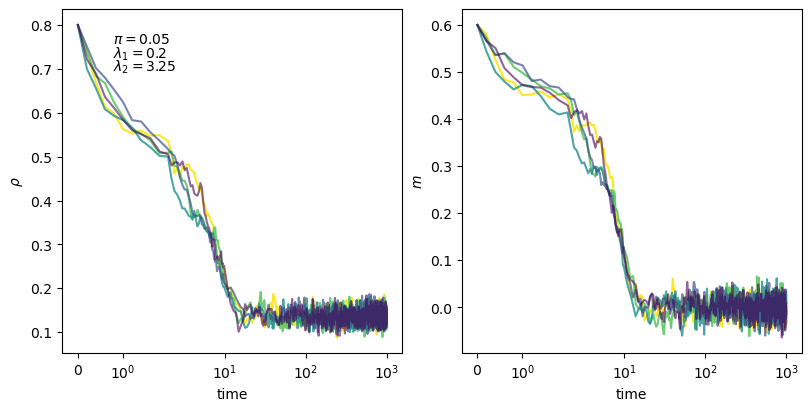

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)

for i in range(2):
    ax[i].set(xlabel='time', xscale='symlog')
ax[0].set_ylabel(r'$\rho$')
ax[1].set_ylabel(r'$m$')

ax[0].text(0.15,0.9, rf'$\pi = {pi}$', transform=ax[0].transAxes)
ax[0].text(0.15,0.86, rf'$\lambda_1 = {l1}$', transform=ax[0].transAxes)
ax[0].text(0.15,0.82, rf'$\lambda_2 = {l2}$', transform=ax[0].transAxes)

Nrea = 5
colors = plt.cm.viridis_r(np.linspace(0,1,Nrea))

for i,c in enumerate(colors):
    time_evo = pd.read_csv(f'{resPath}{folder}time_evo_rea_{i}.csv')
    time_evo['rho'] = time_evo['f1'] + time_evo['f2']
    time_evo['m'] = time_evo['f1'] - time_evo['f2']
    ax[0].plot(time_evo['time'], time_evo['rho'], color=c, alpha = (10-i)/10)
    ax[1].plot(time_evo['time'], time_evo['m'], color=c, alpha = (10-i)/10)

# theoretical solution:
if l1 == 0.0:
    rho = (1+np.sqrt(1-4*r/l2))/2
    ax[0].axhline(rho, 0.0, 1.0, ls='--', color='xkcd:purple', lw=0.8)
    if l2 > (4*pi + 1)**2/(4*pi):
        ax[1].axhline(np.sqrt(rho**2 - 4*pi/l2), ls='--', color='xkcd:orange', lw=0.8)
        ax[1].axhline(-np.sqrt(rho**2 - 4*pi/l2), ls='--', color='xkcd:orange', lw=0.8)
        ax[1].axhline(rho, ls='--', color='xkcd:purple', lw=0.8)
        ax[1].axhline(rho, ls='--', color='xkcd:purple', lw=0.8)
elif l1 > 0.0:
    #### check every time you plot which m solutions you wanna see...
    #### solution with symmetry beaking
    rho = 0.5*(1-l1/l2) + 1/(2*l2)*np.sqrt((l1+l2)**2 - 4*l2)
    ax[0].axhline(rho, 0.0, 1.0, ls='--', color='xkcd:purple', lw=0.8)
    ax[1].axhline(np.sqrt(rho**2 - 4*pi/l2), ls='--', color='xkcd:orange', lw=0.8)
    #### solution without symmetry breaking, m == 0
    # rho = 0.5 - l1/l2 + 1/l2*np.sqrt((l2/2 - l1)**2 + 2*l2*(l1-1)) # this is only when pi == 0... need to import the function for when pi != 0..........
    # ax[0].axhline(rho, 0.0, 1.0, ls='--', color='xkcd:purple', lw=0.8)
    # ax[1].axhline(0.0, 0.0, 1.0, ls='--', color='xkcd:orange', lw=0.8)

fig.savefig(f'time_evo_pi_{pi}_l1_{l1}_l2_{l2}_N_{N}_ic_{ic}_cmap.png')